In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

df1 = pd.read_csv('dataset/customer_data.csv')
df2 = pd.read_csv('dataset/internet_data.csv')
df3 = pd.read_csv('dataset/churn_data.csv')

df = pd.concat([df1, df2, df3], axis=1)

# delete duplicated columns due to concatenation
df = df.loc[:,~df.columns.duplicated()]
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Encoding categorical data

Most of the categorical feature columns are binary class. But some are multi-class. So get_dummies method of pandas is used which creates new columns with specific category of the variable and previous col is dropped

In [2]:
# Encoding categorical values
df_req = df.drop(['customerID','TotalCharges'], axis=1)
df_new = pd.get_dummies(df_req, prefix_sep='_', drop_first=True)
data = pd.concat([df[['customerID','TotalCharges']] ,df_new], axis=1)
data.head()

,customerID,TotalCharges,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,PhoneService_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,29.85,0,1,29.85,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,1889.5,0,34,56.95,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2,3668-QPYBK,108.15,0,2,53.85,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
3,7795-CFOCW,1840.75,0,45,42.30,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,151.65,0,2,70.70,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1


## Data Transformation

Empty/null values are handled

In [3]:
data['TotalCharges'].replace(" ", np.nan, inplace=True)
data.dropna(subset=['TotalCharges'], inplace=True)

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
data.head()

,customerID,TotalCharges,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,PhoneService_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,29.85,0,1,29.85,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,1889.50,0,34,56.95,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2,3668-QPYBK,108.15,0,2,53.85,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
3,7795-CFOCW,1840.75,0,45,42.30,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,151.65,0,2,70.70,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1


In [4]:
X = data.drop(['customerID', 'Churn_Yes'], axis=1)
y = data['Churn_Yes']

In [5]:
# Using RFE for feature selection

decTree = DecisionTreeClassifier()

rfe = RFE(decTree, 25)
rfe = rfe.fit(X, y)

# Selected Features by Recursive Feature Elimination
feature_cols = [a for a,b in zip(X.columns.values, rfe.support_) if b==True]
feature_cols

['TotalCharges',
 'SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'gender_Male',
 'Partner_Yes',
 'Dependents_Yes',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_Yes',
 'TechSupport_Yes',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'PhoneService_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

## Splitting Data and Model Fitting

Splitting data into training and testing data and fitting it into KNN classifier

In [10]:
X = X[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y)
decTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
print("Accuracy:", decTree.score(X_test, y_test)*100, "%")

Accuracy: 73.72013651877133 %


## Performance Metrics

Confusion Matrix and ROC curve to get measure of performance of the model

In [12]:
y_pred = decTree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[1057,  246],
       [ 216,  239]])

In [13]:
print("True Positives:", cm[0][0])
print("False Negatives:", cm[0][1])
print("False Positives:", cm[1][0])
print("True Negatives:", cm[1][1])
print()
print("Correct Predictions:", cm[0][0]+cm[1][1])
print("Wrong Predictions:", cm[0][1]+cm[1][0])

True Positives: 1057
False Negatives: 246
False Positives: 216
True Negatives: 239

Correct Predictions: 1296
Wrong Predictions: 462


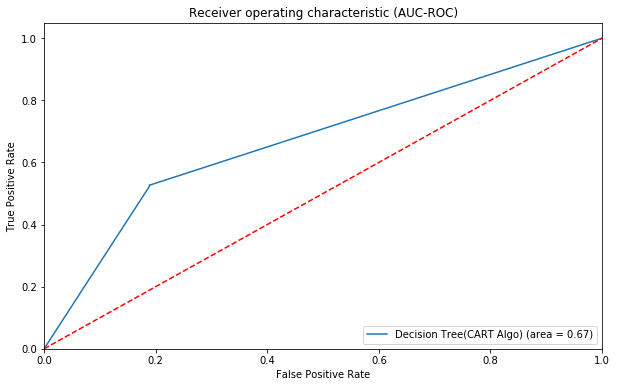

In [14]:
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, decTree.predict_proba(X_test)[:,1])

plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label="Decision Tree(CART Algo) (area = %0.2f)" %roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (AUC-ROC)')
plt.legend(loc="lower right")
plt.show()